# NoSQL (MongoDB) (sesión 1)

## Introducción

![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB. La diferencia es que el *shell* espera código Javascript y aquí trabajaremos con Python. A continuación, se introducen los conceptos básicos para la realización de consultas sencillas en Python.


En primer lugar, unas comprobaciones iniciales.

In [4]:
import sys

RunningInCOLAB: bool = 'google.colab' in sys.modules

## Instalación inicial de MongoDB (sólo necesaria en Google Colab)

In [5]:
import subprocess
import urllib.request

if RunningInCOLAB:
  urllib.request.urlretrieve("https://raw.githubusercontent.com/dsevilla/bdge/refs/heads/25-26/addendum/mongo-utils/run-mongo-local.sh",
                             "run-mongo-local.sh")
  subprocess.run(["sh", "run-mongo-local.sh"])

<details><summary><b>🗂️ Formato datos Stack Overflow</b> <span style="color: #007acc;">▶️ Haz click para ver el esquema y ejemplos</span></summary>

> Notas generales
- Formato: cada fichero es XML y suele distribuirse 7zipped.
- Codificación: UTF-8. Los campos de fecha siguen el formato ISO8601: "YYYY-MM-DDTHH:mm:ss.fff".
- Nulos: cuando un campo no aplica (p.ej., `ParentId` en preguntas), no aparece o viene vacío; en nuestros Parquet suele ser `null`.
- Identificadores: `Id` es clave primaria en cada entidad. Claves foráneas enlazan por `Id` entre ficheros.

---

:file_folder: <b>badges.xml</b> (insignias logradas por usuarios)
- UserId: Id del usuario que recibe la insignia. Ej: 420. Uso: FK a `users.Id`.
- Name: Nombre de la insignia. Ej: "Teacher". Uso: clasificar tipo de logro.
- Date: Fecha de concesión. Ej: "2008-09-15T08:55:03.923". Uso: series temporales.
- Class: Categoría (1=Gold, 2=Silver, 3=Bronze). Ej: 3. Uso: nivel de la insignia.
- TagBased: Si la insignia es específica de etiqueta. Ej: true. Uso: filtrar logros por etiquetas.

---

:file_folder: <b>comments.xml</b> (comentarios en publicaciones)
- Id: Identificador del comentario. Ej: 12345. Uso: PK.
- PostId: Publicación a la que comenta. Ej: 100234. Uso: FK a `posts.Id`.
- Score: Puntuación del comentario. Ej: 5. Uso: ordenar/filtrar relevancia.
- Text: Texto del comentario. Ej: "¿Puedes compartir el error exacto?". Uso: contenido.
- CreationDate: Fecha de creación. Ej: "2008-09-06T08:07:10.730". Uso: análisis temporal.
- UserId: Autor del comentario. Ej: 314159. Uso: FK a `users.Id`.
- UserDisplayName: Nombre mostrado si el usuario fue eliminado. Ej: "user123". Uso: se usa cuando `UserId` es nulo/ausente.
- ContentLicense: Licencia del contenido. Ej: "CC BY-SA 4.0". Uso: cumplimiento/licencias.

---

:file_folder: <b>posts.xml</b> (preguntas y respuestas)
- Id: Identificador de la publicación. Ej: 98765. Uso: PK.
- PostTypeId: Tipo (1=Pregunta, 2=Respuesta). Ej: 1. Uso: rutas de procesamiento/particionado.
- ParentId: Id de la pregunta padre si es respuesta. Ej: 1234. Uso: FK a `posts.Id` (solo si `PostTypeId=2`).
- AcceptedAnswerId: Id de la respuesta aceptada (solo en preguntas). Ej: 4567. Uso: FK a `posts.Id` para marcar aceptadas.
- CreationDate: Fecha de creación. Ej: "2010-02-15T10:21:34.120". Uso: análisis temporal.
- Score: Votos netos (upvotes-downvotes). Ej: 42. Uso: ranking/calidad.
- ViewCount: Nº de vistas (solo preguntas). Ej: 12345. Uso: popularidad.
- Body: HTML/Markdown del cuerpo. Ej: "<p>¿Cómo...?</p>". Uso: contenido/NLP.
- OwnerUserId: Autor. Ej: 271828. Uso: FK a `users.Id`.
- OwnerDisplayName: Nombre mostrado si el autor fue eliminado. Ej: "John Doe". Uso: se usa cuando `OwnerUserId` es nulo (usuario eliminado o anónimo).
- LastEditorUserId: Último usuario que editó. Ej: 314159. Uso: FK a `users.Id`.
- LastEditorDisplayName: Nombre si el editor fue eliminado. Ej: "Community". Uso: solo cuando `LastEditorUserId` es nulo.
- LastEditDate: Fecha de última edición. Ej: "2009-03-05T22:28:34.823". Uso: auditoría.
- LastActivityDate: Última actividad (edición, comentario, etc.). Ej: "2009-03-11T12:51:01.480". Uso: ordenación por actividad reciente.
- CommunityOwnedDate: Fecha desde la que es de la comunidad. Ej: "2009-03-11T12:51:01.480". Uso: gobernanza.
- ClosedDate: Fecha de cierre (si procede). Ej: "2012-01-01T12:00:00.000". Uso: moderación.
- Title: Título de la pregunta. Ej: "¿Cómo unir listas en Python?". Uso: metadata/búsqueda.
- Tags: Lista de etiquetas en formato XML/HTML: "<python><list><merge>". Uso: clasificación por tema.
- AnswerCount: Nº de respuestas (en preguntas). Ej: 5. Uso: engagement.
- CommentCount: Nº de comentarios. Ej: 3. Uso: actividad.
- FavoriteCount: Favoritos marcados (legacy). Ej: 10. Uso: popularidad histórica.
- ContentLicense: Licencia. Ej: "CC BY-SA 4.0". Uso: cumplimiento.

---

:file_folder: <b>posthistory.xml</b> (historial detallado de cambios)
- Id: PK del evento de historial. Ej: 5555.
- PostHistoryTypeId: Tipo de cambio. Uso: clasifica el evento. Ejemplos:
  - 1: Initial Title – primer título de la pregunta.
  - 2: Initial Body – primer cuerpo en crudo.
  - 3: Initial Tags – primeras etiquetas.
  - 4: Edit Title – cambio de título.
  - 5: Edit Body – cambio de cuerpo (markdown crudo).
  - 6: Edit Tags – cambio de etiquetas.
  - 7/8/9: Rollback Title/Body/Tags – revertidos.
  - 10: Post Closed – cierre por votos.
  - 11: Post Reopened – reapertura.
  - 12/13: Post Deleted/Undeleted – borrado/restaurado.
  - 14/15: Post Locked/Unlocked – bloqueado/desbloqueado.
  - 16: Community Owned – pasa a comunidad.
  - 17: Post Migrated – migración (origen/destino).
  - 18: Question Merged – fusión de preguntas.
  - 19/20: Question Protected/Unprotected – protegido/desprotegido.
  - 21: Post Disassociated – se elimina el OwnerUserId.
  - 22: Question Unmerged – deshace fusión.
- PostId: Publicación afectada. Ej: 98765. Uso: FK a `posts.Id`.
- RevisionGUID: Agrupa múltiples registros de un mismo acto. Ej: "3E5B...". Uso: correlación.
- CreationDate: Fecha del evento. Ej: "2009-03-05T22:28:34.823".
- UserId: Usuario que realiza el cambio. Ej: 271828. Uso: FK a `users.Id`.
- UserDisplayName: Si el usuario fue eliminado. Ej: "user123". Uso: cuando `UserId` nulo.
- Comment: Comentario del editor. Ej: "typo fix". Uso: auditoría.
- Text: Valor crudo nuevo asociado al cambio. Ej: nuevo markdown o JSON.
  - Para tipos 10–15: JSON con usuarios que han votado esa acción de moderación.
  - Para tipo 17: Detalles de migración: "from <url>" o "to <url>".
- CloseReasonId: Motivo de cierre (histórico). Ejemplos:
  - 1: Exact Duplicate – duplicada de otra.
  - 2: off-topic – fuera de tema.
  - 3: subjective – demasiado subjetiva.
  - 4: not a real question – no es una pregunta real.
  - 7: too localized – demasiado localizada.

---

:file_folder: <b>postlinks.xml</b> (enlaces entre publicaciones)
- Id: PK del enlace. Ej: 2222.
- CreationDate: Fecha del enlace. Ej: "2011-05-05T10:00:00.000".
- PostId: Publicación origen. Ej: 1000. Uso: FK a `posts.Id`.
- RelatedPostId: Publicación destino. Ej: 1001. Uso: FK a `posts.Id`.
- PostLinkTypeId: Tipo de relación. Uso: grafo entre posts.
  - 1: Linked – relacionados.
  - 3: Duplicate – duplicados.

---

:file_folder: <b>users.xml</b> (usuarios)
- Id: PK del usuario. Ej: 271828.
- AccountId: Id de cuenta en la red Stack Exchange. Ej: 123456. Uso: consolidación multi-sitio.
- Reputation: Reputación. Ej: 15234. Uso: privilegios/ordenación.
- CreationDate: Alta del usuario. Ej: "2008-07-31T21:42:52.667".
- DisplayName: Nombre mostrado. Ej: "Jane Doe". Uso: UI.
- EmailHash: Hash MD5 de email (legacy). Ej: "fcea920f...". Uso: avatar histórico.
- LastAccessDate: Último acceso. Ej: "2020-04-01T12:00:00.000". Uso: actividad.
- WebsiteUrl: Web personal. Ej: "https://janedoe.dev".
- Location: Ubicación libre. Ej: "Madrid, ES".
- Age: Edad (cuando se compartía). Ej: 32.
- AboutMe: BIO en HTML/Markdown. Ej: "<p>Desarrollo datos...</p>".
- Views: Visitas al perfil. Ej: 1234.
- UpVotes: Upvotes emitidos por el usuario. Ej: 500.
- DownVotes: Downvotes emitidos. Ej: 20.
- ProfileImageUrl: Avatar. Ej: "https://.../image.png".

---

:file_folder: <b>votes.xml</b> (votos a publicaciones)
- Id: PK del voto. Ej: 7777.
- PostId: Publicación votada. Ej: 98765. Uso: FK a `posts.Id`.
- VoteTypeId: Tipo de voto/acción. Uso: métricas de calidad/moderación.
  - 1: AcceptedByOriginator – el autor de la pregunta acepta una respuesta (equivale a `AcceptedAnswerId`).
  - 2: UpMod – upvote.
  - 3: DownMod – downvote.
  - 4: Offensive – ofensivo (legacy).
  - 5: Favorite – marcado como favorito (legacy); si `VoteTypeId=5`, `UserId` se rellena.
  - 6: Close – voto de cierre.
  - 7: Reopen – voto de reapertura.
  - 8: BountyStart – inicio de recompensa.
  - 9: BountyClose – cierre de recompensa; si `VoteTypeId=9`, `BountyAmount` se rellena.
  - 10: Deletion – voto de borrado.
  - 11: Undeletion – voto de restauración.
  - 12: Spam – marcado como spam.
  - 13: InformModerator – informar a moderación.
- CreationDate: Fecha del voto. Ej: "2015-06-10T09:30:00.000".
- UserId: Usuario que vota (solo para algunos tipos como 5). Ej: 54321. Uso: FK a `users.Id`.
- BountyAmount: Cantidad de recompensa (solo tipo 9). Ej: 100.

---

:file_folder: <b>tags.xml</b> (etiquetas del sitio)
- Id: PK de la etiqueta. Ej: 42.
- TagName: Nombre de la etiqueta. Ej: "python". Uso: clasificación temática.
- Count: Nº de usos en preguntas. Ej: 150234. Uso: popularidad.
- ExcerptPostId: Id del post con el extracto de la wiki de etiqueta. Ej: 123. Uso: FK a `posts.Id`.
- WikiPostId: Id del post con el artículo de la wiki de etiqueta. Ej: 124. Uso: FK a `posts.Id`.

</details>

## Instalación de la librería `pymongo`

In [6]:
%pip install pymongo 'pandas[performance,parquet]'

In [7]:
from pprint import pprint as pp

import matplotlib
import pandas as pd

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [8]:
from pymongo import MongoClient

## Conexión a la base de datos

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`), o bien a `localhost` si lo estamos haciendo en Colab.

In [9]:
import os

db_hostname: str = os.getenv('DB_HOSTNAME', "localhost")

Nótese cómo especificamos que los documentos que usaremos en la base de datos son de tipo `dict[str, Any]`. Este es el tipo genérico de los documentos, y nos permite tener cierto grado de tipado en los documentos. Existen otras formas de generar tipos más específicos, pero no las veremos por ahora.

In [10]:
from typing import Any

client: MongoClient[dict[str, Any]] = MongoClient(db_hostname, 27017, compressors='zlib')
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, compressors=['zlib'])

In [11]:
client.list_database_names()

['admin', 'config', 'local']

Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [12]:
from pymongo.database import Database

db: Database = client.stackoverflow
# db: Database = client['stackoverflow'] # (equivalente)
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, compressors=['zlib']), 'stackoverflow')

## Colecciones en MongoDB

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

Las colecciones en Mongo pueden cambiarse de nombre con la función `.rename()`.

Vamos a crear una colección ficticia llamada *colleccion* para posteriormente renombrarla como *startwars*.

Al establecer el parámetro `dropTarget` a `True` forzamos a que, si ya existía una colección `starwars` sus datos se  sobreescriben por la nueva colección renombrada.

In [13]:
from pymongo.collection import Collection

# creamos la colección
collection: Collection = db['coleccion']
docs: list[dict] = [{"id":1, "nombre": "Luke"},
        {"id":3, "nombre": "Leia"}]
collection.insert_many(docs)

# Ahora la renombramos
collection.rename('starwars', dropTarget=True)

pp(client.list_database_names())
pp(db.list_collection_names())

['admin', 'config', 'local', 'stackoverflow']
['starwars']


Ahora vemos que se ha creado una nueva BD `stackoverflow` en Mongo.

In [14]:
client.list_database_names()

['admin', 'config', 'local', 'stackoverflow']

### Importación de los ficheros Parquet y uso de Pymongo

In [15]:
from asyncio import Queue, Task, create_task, to_thread

from pandas import DataFrame


def load_dataframe(parquetfile: str, logqueue: Queue[str] | None = None) -> DataFrame:
    BASE_URL: str = "https://github.com/dsevilla/bd2-data/releases/download/parquet-files-25-26/"
    try:
        df: DataFrame = pd.read_parquet(f"{BASE_URL}/{parquetfile}", dtype_backend="pyarrow")
        logqueue.put_nowait(f"Loaded {len(df)} rows from dataframe.") if logqueue else None

        return df

    except Exception as e:
        logqueue.put_nowait(f"Error loading Dataframe: {e}.") if logqueue else None
        raise e

In [16]:
from pymongo.collection import Collection
from pymongo.results import InsertManyResult


def insert_dataframe_into_mongo(
    collection: Collection, df: DataFrame, logqueue: Queue | None = None
) -> InsertManyResult:
    result: InsertManyResult = collection.insert_many(
        df.to_dict("records"), ordered=False, bypass_document_validation=True
    )
    logqueue.put_nowait(f"Inserted {len(df)} records into MongoDB.") if logqueue else None
    return result


def load_parquet_into_mongo(
    collection: Collection,
    parquetfile: str,
    logqueue: Queue[str] | None = None,
) -> InsertManyResult:
    df: DataFrame = load_dataframe(parquetfile, logqueue)
    try:
        return insert_dataframe_into_mongo(collection, df, logqueue)
    except Exception as e:
        logqueue.put_nowait(f"Error inserting DataFrame into MongoDB: {e}.") if logqueue else None
        raise e
    finally:
        del df  # Free memory

Importación de los ficheros Parquet. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

Creamos un índice para el campo 'Id' en la colección de tags.

In [17]:
tags_collection: Collection[dict[str, Any]] = db["tags"]
tags_collection.create_index([("Id", 1)], unique=True)

'Id_1'

Se crea una cola de mensajes (`Queue`) para que los procesos en segundo plano puedan ir mostrando el progreso de la importación. En cualquier momento se puede leer mensajes de esa cola (si están disponibles) y podemos ver si se ha producido algún error o si se ha terminado de procesar los elementos.

La importación de los *Tags* se realiza en primer plano porque es pequeña. El resto de colecciones las importaremos en segundo plano (con un hilo o *thread*).

In [18]:
# No añadir datos si ya existe la colección
existing_tags_count: int = tags_collection.count_documents({})
if existing_tags_count > 0:
    print("La colección Tags ya existe. No se realiza la importación. Elimínala con drop().")
else:
    insert_tags_queue: Queue[str] = Queue()
    load_parquet_into_mongo(tags_collection, "Tags.parquet", insert_tags_queue)
    while not insert_tags_queue.empty():
        log_message: str = await insert_tags_queue.get()
        print(log_message)

Loaded 3048 rows from dataframe.
Inserted 3048 records into MongoDB.


In [19]:
tags_collection.find_one()

{'_id': ObjectId('6996c73cc353356c98987a16'),
 'Id': 1,
 'Count': 1472,
 'ExcerptPostId': 680,
 'TagName': '.net',
 'WikiPostId': 679}

Importamos los datos de Stackoverflow. Lo haremos en paralelo con todas las colecciones restantes:

In [20]:
users_collection: Collection[dict[str, Any]] = db["users"]
users_collection.create_index([("Id", 1)], unique=True)

users_load_task: Task[InsertManyResult] = create_task(
    to_thread(load_parquet_into_mongo, users_collection, "Users.parquet")
)

In [21]:
posts_collection: Collection[dict[str, Any]] = db["posts"]
posts_collection.create_index([("Id", 1)], unique=True)

posts_load_queue: Queue[str] = Queue()
posts_load_task: Task[InsertManyResult] = create_task(
    to_thread(load_parquet_into_mongo, posts_collection, "Posts.parquet", posts_load_queue)
)

In [22]:
comments_collection: Collection[dict[str, Any]] = db["comments"]
comments_collection.create_index([("Id", 1)], unique=True)

comments_load_queue: Queue[str] = Queue()
comments_load_task: Task[InsertManyResult] = create_task(
    to_thread(load_parquet_into_mongo, comments_collection, "Comments.parquet", comments_load_queue)
)

In [23]:
votes_collection: Collection[dict[str, Any]] = db["votes"]
votes_collection.create_index([("Id", 1)], unique=True)

votes_load_queue: Queue[str] = Queue()
votes_load_task: Task[InsertManyResult] = create_task(
    to_thread(load_parquet_into_mongo, votes_collection, "Votes.parquet", votes_load_queue)
)

In [24]:
print(f"Post loading done: {posts_load_task.done()}.")
while not posts_load_queue.empty():
    log_message: str = posts_load_queue.get_nowait()
    print(log_message)

Post loading done: False.


In [25]:
users_load_task.done()

False

In [26]:
comments_load_task.done()

False

In [27]:
votes_load_task.done()

False

Vamos a esperar sólo a los post para poder trabajar con ellos. En Python se puede trabajar en modo asíncrono o con hilos usando la partícula `await` para esperar a que terminen tanto tareas en segundo plano como funciones asíncronas:

In [28]:
await posts_load_task;

In [29]:
db.posts.count_documents({})

410346

## El API de colección de MongoDB

El API de colección en Python se puede encontrar aquí: https://docs.mongodb.com/drivers/pymongo/. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior. Existe incluso un curso de la MongoDB University que se puede realizar de forma gratuita: https://learn.mongodb.com/learning-paths/using-mongodb-with-python

Con `.find_one` obtenemos el primer elemento de la colección `posts`. Aunque la carga no esté completa, ya que se está realizando en segundo plano, siempre habrá al menos un elemento en la colección que se puede coger de ejemplo.

Utilizamos la librería `pp` (*PrettyPrint*) para imprimir los objetos grandes de una manera amigable.

In [30]:
posts: Collection[dict[str, Any]] = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, compressors=['zlib']), 'stackoverflow'), 'posts')

In [31]:
post: dict[str, Any] = posts.find_one() or {}
pp(post)

{'AcceptedAnswerId': 2,
 'AnswerCount': 1,
 'Body': '<p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero '
         'añadir soporte para la negociación del tipo de contenido basado en '
         'extensiones en el <em>URI</em>, así que he añadido lo siguiente al '
         'código de inicialización del '
         'servicio:</p><br/><br/><pre><code>public static class '
         'WebApiConfig<br/>{<br/>  public static void '
         'Register(HttpConfiguration config)<br/>  {<br/>    '
         'config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", '
         '"application/json");<br/>    '
         'config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", '
         '"application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para '
         'que esto funcione necesito crear dos rutas para cada acción del '
         'controlador (estoy usando exclusivamente enrutamiento basado en '
         'atributos):</p><br/><br/><pre><code>[Route("item/{id}

También podemos verlos con simplemente:

In [32]:
post

{'_id': ObjectId('6996c78ec353356c98b3f106'),
 'Id': 1,
 'AcceptedAnswerId': 2,
 'AnswerCount': 1,
 'Body': '<p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero añadir soporte para la negociación del tipo de contenido basado en extensiones en el <em>URI</em>, así que he añadido lo siguiente al código de inicialización del servicio:</p><br/><br/><pre><code>public static class WebApiConfig<br/>{<br/>  public static void Register(HttpConfiguration config)<br/>  {<br/>    config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", "application/json");<br/>    config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", "application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para que esto funcione necesito crear dos rutas para cada acción del controlador (estoy usando exclusivamente enrutamiento basado en atributos):</p><br/><br/><pre><code>[Route("item/{id}/details")]<br/>[Route("item/{id}/details.{ext}")]<br/>[HttpGet]<br/>public ItemDetail[] GetItemDeta

Siendo un diccionario también se puede usar `.items()`.

In [33]:
post: dict = db.posts.find_one() or {}
for k, v in post.items():
    print(f"{k}: {v}")

_id: 6996c78ec353356c98b3f106
Id: 1
AcceptedAnswerId: 2
AnswerCount: 1
Body: <p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero añadir soporte para la negociación del tipo de contenido basado en extensiones en el <em>URI</em>, así que he añadido lo siguiente al código de inicialización del servicio:</p><br/><br/><pre><code>public static class WebApiConfig<br/>{<br/>  public static void Register(HttpConfiguration config)<br/>  {<br/>    config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", "application/json");<br/>    config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", "application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para que esto funcione necesito crear dos rutas para cada acción del controlador (estoy usando exclusivamente enrutamiento basado en atributos):</p><br/><br/><pre><code>[Route("item/{id}/details")]<br/>[Route("item/{id}/details.{ext}")]<br/>[HttpGet]<br/>public ItemDetail[] GetItemDetails(int id)<br/>{<br/>  return i

La carga se está realizando en paralelo. Esto es útil para que no se bloquee el *notebook* mientras se cargan los datos. Como los posts los cargamos síncronamente, podemos trabajar con ellos. Además, aunque todos los usuarios no se hayan leído, sí que siempre habrá al menos uno.

In [34]:
posts.count_documents({})

410346

Con `.find_one` obtenemos el primer elemento de la colección `users`.

In [35]:
users: Collection[dict[str, Any]] = db.users
pp(users.find_one())

{'AboutMe': '<p>Hola, no soy una persona real.</p><br/><br/><p>¡Soy un proceso '
            'que ayuda a mantener el sitio limpio!</p><br/><br/><p>Hago cosas '
            'como:</p><br/><br/><ul><br/><li>Dar empujoncitos a preguntas '
            'antiguas sin respuesta aproximadamente cada hora, para que '
            'atraigan algo de atención.</li><br/><li>Tener la propiedad de las '
            'preguntas y respuestas wiki para que nadie se lleve reputación '
            'por ellas</li><br/><li>Recibir la propiedad de los votos '
            'negativos en las publicaciones de spam o dañinas que son borradas '
            'permanentemente</li><br/><li>Tener la propiedad de las ediciones '
            'sugeridas por usuarios anónimos</li><br/><li><a '
            'href="http://meta.stackoverflow.com/a/92006">Quitar preguntas '
            'abandonadas</a></li><br/></ul><br/>',
 'AccountId': -1,
 'CreationDate': datetime.datetime(2015, 10, 26, 21, 36, 24, 767000),
 'DisplayName': 'C

A cada objeto se le asigna una clave implícita con nombre "`_id`" (si el objeto no lo incluye). Visualizamos la clave "`_id`" asignada en la colección `posts`.

In [36]:
print (type(post['_id']))
post['_id']

<class 'bson.objectid.ObjectId'>


ObjectId('6996c78ec353356c98b3f106')

La siguiente sintaxis está descatalogada en las nuevas versiones, pero era más conveniente:

In [37]:
#posts.save(post)

Ahora hay que hacerlo así (el resultado será 0 porque el documento no ha sido modificado desde que se leyó, pero sería 1 si el documento se modificó):

In [38]:
from pymongo.results import UpdateResult

result: UpdateResult = posts.replace_one({"_id": post['_id']}, post)
result.modified_count

0

## Búsqueda de documentos

Vamos a estudiar cómo buscar documentos en una colección de la BD.

En primer lugar con `.find_one` podemos buscar el primer elemento que cumpla una condición.


In [39]:
post: dict[str, Any] = posts.find_one() or {}
pp(post)

{'AcceptedAnswerId': 2,
 'AnswerCount': 1,
 'Body': '<p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero '
         'añadir soporte para la negociación del tipo de contenido basado en '
         'extensiones en el <em>URI</em>, así que he añadido lo siguiente al '
         'código de inicialización del '
         'servicio:</p><br/><br/><pre><code>public static class '
         'WebApiConfig<br/>{<br/>  public static void '
         'Register(HttpConfiguration config)<br/>  {<br/>    '
         'config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", '
         '"application/json");<br/>    '
         'config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", '
         '"application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para '
         'que esto funcione necesito crear dos rutas para cada acción del '
         'controlador (estoy usando exclusivamente enrutamiento basado en '
         'atributos):</p><br/><br/><pre><code>[Route("item/{id}

In [40]:
for k,v in post.items():
    print(f"{k}: {v}")

_id: 6996c78ec353356c98b3f106
Id: 1
AcceptedAnswerId: 2
AnswerCount: 1
Body: <p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero añadir soporte para la negociación del tipo de contenido basado en extensiones en el <em>URI</em>, así que he añadido lo siguiente al código de inicialización del servicio:</p><br/><br/><pre><code>public static class WebApiConfig<br/>{<br/>  public static void Register(HttpConfiguration config)<br/>  {<br/>    config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", "application/json");<br/>    config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", "application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para que esto funcione necesito crear dos rutas para cada acción del controlador (estoy usando exclusivamente enrutamiento basado en atributos):</p><br/><br/><pre><code>[Route("item/{id}/details")]<br/>[Route("item/{id}/details.{ext}")]<br/>[HttpGet]<br/>public ItemDetail[] GetItemDetails(int id)<br/>{<br/>  return i

Además de `find_one()`, la función principal de búsqueda es `find()`. Esta función ofrece un conjunto muy amplio de opciones para búsqueda, que estudiaremos a continuación.

Primero, una consulta sencilla, con el valor del campo `PostTypeId`. Ten en cuenta que el valor devuelto es un objeto `cursor`, que deberíamos recorrer para ver su contenido (lo haremos un poco más adelante).

In [41]:
db.posts.find({"PostTypeId": 2})

Calculamos el número de documentos que cumplen esa condición, es decir, que son una respuesta:

In [42]:
db.posts.count_documents({"PostTypeId": 2})

211615

También existe `explain()`, al estilo de SQL.

In [43]:
db.posts.find({"PostTypeId": 2}).explain()

{'explainVersion': '1',
 'queryPlanner': {'namespace': 'stackoverflow.posts',
  'parsedQuery': {'PostTypeId': {'$eq': 2}},
  'indexFilterSet': False,
  'queryHash': '90E96344',
  'planCacheShapeHash': '90E96344',
  'planCacheKey': '55086D4C',
  'optimizationTimeMillis': 0,
  'maxIndexedOrSolutionsReached': False,
  'maxIndexedAndSolutionsReached': False,
  'maxScansToExplodeReached': False,
  'prunedSimilarIndexes': False,
  'winningPlan': {'isCached': False,
   'stage': 'COLLSCAN',
   'filter': {'PostTypeId': {'$eq': 2}},
   'direction': 'forward'},
  'rejectedPlans': []},
 'executionStats': {'executionSuccess': True,
  'nReturned': 211615,
  'executionTimeMillis': 325,
  'totalKeysExamined': 0,
  'totalDocsExamined': 410346,
  'executionStages': {'isCached': False,
   'stage': 'COLLSCAN',
   'filter': {'PostTypeId': {'$eq': 2}},
   'nReturned': 211615,
   'executionTimeMillisEstimate': 304,
   'works': 410347,
   'advanced': 211615,
   'needTime': 198731,
   'needYield': 0,
   'saveS

También se puede limitar la búsqueda con la función `.limit`

In [44]:
from pymongo.cursor import Cursor

respuestas: Cursor[dict[str, Any]] = posts.find({'PostTypeId': 2}).limit(10)

La respuesta no es un conjunto de elementos, sino un cursor que puede ir recorriéndose. ¿Por qué?

In [45]:
respuestas

In [46]:
pp(list(respuestas))

[{'AcceptedAnswerId': None,
  'AnswerCount': 0,
  'Body': '<p>He encontrado la solución.</p><br/><br/><p>Resulta que las rutas '
          'tienen asignada una <strong>precedencia</strong> numérica asignada, '
          'que el motor de enrutamiento de WebApi usa para decidir qué ruta '
          'usar en caso de conflicto. Las rutas creadas automáticamente para '
          'una misma acción siempre tienen una precedencia distinta, ¡pero la '
          'ruta que yo estaba creando manualmente tenía la misma precedencia '
          'que la ya existente!</p><br/><br/><p>Así pues la solución es añadir '
          'lo siguiente a <code>GetActionDirectRoutes</code>, inmediatamente '
          'después de <code>new '
          'RouteEntry</code>:</p><br/><br/><pre><code>entry.Route.DataTokens["precedence"] '
          '= <br/>    ((decimal)route.Route.DataTokens["precedence"]) - '
          '0.1M;<br/></code></pre><br/>',
  'ClosedDate': None,
  'CommentCount': 2,
  'CommunityOwnedDate': None

También podemos usar la opción `to_list`:

In [47]:
from pymongo.cursor import Cursor

respuestas: Cursor[dict[str, Any]] = posts.find({'PostTypeId': 2}).limit(10)
respuestas.to_list()

[{'_id': ObjectId('6996c78ec353356c98b3f107'),
  'Id': 2,
  'AcceptedAnswerId': None,
  'AnswerCount': 0,
  'Body': '<p>He encontrado la solución.</p><br/><br/><p>Resulta que las rutas tienen asignada una <strong>precedencia</strong> numérica asignada, que el motor de enrutamiento de WebApi usa para decidir qué ruta usar en caso de conflicto. Las rutas creadas automáticamente para una misma acción siempre tienen una precedencia distinta, ¡pero la ruta que yo estaba creando manualmente tenía la misma precedencia que la ya existente!</p><br/><br/><p>Así pues la solución es añadir lo siguiente a <code>GetActionDirectRoutes</code>, inmediatamente después de <code>new RouteEntry</code>:</p><br/><br/><pre><code>entry.Route.DataTokens["precedence"] = <br/>    ((decimal)route.Route.DataTokens["precedence"]) - 0.1M;<br/></code></pre><br/>',
  'ClosedDate': None,
  'CommentCount': 2,
  'CommunityOwnedDate': None,
  'ContentLicense': 'CC BY-SA 3.0',
  'CreationDate': datetime.datetime(2015, 10, 2

También se puede importar en un Dataframe de `pandas`:

In [48]:
respuestas: Cursor[dict[str, Any]]  = posts.find({"PostTypeId": 2}).limit(30)
df = pd.DataFrame(respuestas)
df.head()

,_id,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,ContentLicense,CreationDate,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,6996c78ec353356c98b3f107,2,None,0,<p>He encontrado la solución.</p><br/><br/><p>...,None,2,None,CC BY-SA 3.0,2015-10-29 19:14:23.673,...,None,NaN,None,23.0,1,2,31,None,None,0
1,6996c78ec353356c98b3f109,4,None,0,"<p><code>.AsString</code> devuelve el mismo ""<...",None,0,None,CC BY-SA 3.0,2015-10-30 00:45:47.640,...,None,25.0,None,24.0,3,2,6,None,None,0
2,6996c78ec353356c98b3f10c,7,None,0,"<p>Lo de elegancia es algo difícil de decir, e...",None,0,None,CC BY-SA 3.0,2015-10-30 05:30:50.993,...,None,29967.0,None,25.0,5,2,29,None,None,0
3,6996c78ec353356c98b3f10e,9,None,0,<p>Antes de responder directamente la respuest...,None,1,None,CC BY-SA 3.0,2015-10-30 13:59:47.113,...,None,NaN,None,21.0,3,2,12,None,None,0
4,6996c78ec353356c98b3f110,11,None,0,<p>En el primer caso:</p><br/><br/><pre><code>...,None,2,None,CC BY-SA 3.0,2015-10-30 14:43:43.737,...,None,25.0,None,23.0,10,2,25,None,None,0


<Axes: >

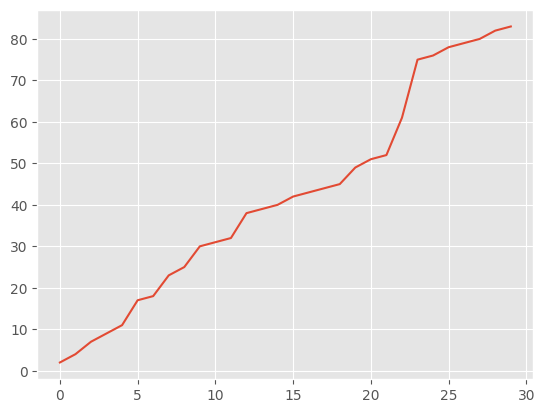

In [49]:
df['Id'].plot()

### Búsquedas anidadas

La función `find()` tiene un gran número de posibilidades para especificar la búsqueda. Se pueden utilizar cualificadores complejos como:

- `$and`
- `$or`
- `$not`

Estos calificadores unen "objetos", no valores. Por otro lado, hay otros calificadores que se refieren a valores:

- `$lt` (menor)
- `$lte` (menor o igual)
- `$gt` (mayor)
- `$gte` (mayor o igual)

Obtenemos aquellas respuestas que tengan un `Id` mayor a 100, limitando la búsqueda a 10:

In [50]:
respuestas: Cursor[dict[str, Any]] = posts.find({
    '$and' : [
        {"PostTypeId": 2} ,
        {"Id" : {'$gte' : 100}}
    ]}).limit(10)
pp(list(respuestas))

[{'AcceptedAnswerId': None,
  'AnswerCount': 0,
  'Body': '<pre><code>$ git reset --soft HEAD~  o $ git reset --soft '
          'HEAD~1       #1<br/>// Cambios necesarios '
          '//                                    #2<br/>$ git add '
          '...                                               #3<br/>$ git '
          'commit ...                                            '
          '#4<br/></code></pre><br/><br/><p>Simplemente haces un reset soft, '
          'con lo que te quedas con los cambios en local pero deshaces el '
          'commit, después haces lo que quieras y vuelves a hacer el commit '
          'como querías la primera vez.</p><br/>',
  'ClosedDate': None,
  'CommentCount': 0,
  'CommunityOwnedDate': None,
  'ContentLicense': 'CC BY-SA 3.0',
  'CreationDate': datetime.datetime(2015, 12, 1, 19, 0, 31, 680000),
  'FavoriteCount': 0,
  'Id': 102,
  'LastActivityDate': datetime.datetime(2015, 12, 1, 19, 0, 31, 680000),
  'LastEditDate': None,
  'LastEditorDisplayN

Vamos ahora a obtener aquellas preguntas que tengan un `Score` mayor a 100, limitando la búsqueda a 10.

In [51]:
respuestas: Cursor[dict[str, Any]] = posts.find({ '$and' : [ {"PostTypeId": 1},
                                    {"Score" : {'$gt' : 100}} ]}).limit(10)
pp(list(respuestas))

[{'AcceptedAnswerId': 40,
  'AnswerCount': 3,
  'Body': '<p>¿Cuál es la diferencia entre un <code>inner</code> y un '
          '<code>outer join</code>?</p><br/><p>Y ¿cuál es la función de los '
          'modificadores?</p><br/><ul><br/><li><code>left</code></li><br/><li><code>right</code></li><br/><li><code>full</code></li><br/></ul><br/>',
  'ClosedDate': None,
  'CommentCount': 1,
  'CommunityOwnedDate': None,
  'ContentLicense': 'CC BY-SA 4.0',
  'CreationDate': datetime.datetime(2015, 11, 2, 15, 31, 51, 453000),
  'FavoriteCount': 0,
  'Id': 36,
  'LastActivityDate': datetime.datetime(2023, 7, 12, 6, 22, 59, 157000),
  'LastEditDate': datetime.datetime(2020, 7, 23, 3, 20, 28, 683000),
  'LastEditorDisplayName': None,
  'LastEditorUserId': 128299,
  'OwnerDisplayName': None,
  'OwnerUserId': 21,
  'ParentId': None,
  'PostTypeId': 1,
  'Score': 141,
  'Tags': '<mysql><sql><join>',
  'Title': '¿Cuál es la diferencia entre un inner y un outer join?',
  'ViewCount': 98529,
  '_id': 

Con el método `.sort` podemos ordenar los resultados en base a un campo. Dependiendo del valor del segundo parámetros tendremos un orden
* Ascendente (1)
* Descendente (-1)

Ahora obtenemos aquellas preguntas que tengan un `Score` mayor a 100, y las ordenamos de forma ascendente por `LastActivityDate`. Date cuenta que limitamos la búsqueda a 10.

In [52]:
respuestas: Cursor[dict[str, Any]] = posts.find({ '$and' : [ {"PostTypeId": 1},
                                    {"Score" : {'$gt' : 100}} ]}) \
                  .limit(10) \
                  .sort("LastActivityDate",1)
pp(list(respuestas))

[{'AcceptedAnswerId': 29198,
  'AnswerCount': 15,
  'Body': '<p>La mayoría de nosotros decimos, (muchas veces sin saber '
          'realmente),</p><br/><br/><blockquote><br/>  <p>“No utilizar '
          'variables '
          'globales”</p><br/></blockquote><br/><br/><hr><br/><br/><p><a '
          'href="http://martinfowler.com/">Martin Fowler</a> expresa en unos '
          'de sus libros, <a '
          'href="https://www.amazon.co.uk/gp/product/0321127420/ref=as_li_ss_tl?ie=UTF8&amp;tag=mundogeek-21&amp;linkCode=as2&amp;camp=1634&amp;creative=19450&amp;creativeASIN=0321127420">Patterns '
          'of Enterprise Application Architecture</a>, que '
          '</p><br/><br/><blockquote><br/>  <p>“cualquier variable global es '
          'siempre culpable hasta que se demuestre<br/>  lo '
          'contrario”</p><br/></blockquote><br/><br/><ul><br/><li>¿Por qué es '
          'una mala practica usar variables globales?</li><br/><li>¿Realmente '
          'son perjudiciales?</li><br

### Búsqueda por fechas

Es posible realizar búsquedas por fecha cuando los documentos incluyan atributos de ese tipo.

Para ello podemos usar `datetime` a la hora de definir los filtros.

En la siguiente búsqueda se buscan aquellos posts que tengan el `LastActivityDate` entre el 29/9/2021 y el 24/9/2023.   

In [53]:
from datetime import datetime

start = datetime(2021, 9, 29)
end = datetime(2023, 9, 24)

respuestas: Cursor[dict[str, Any]] = posts.find({
    '$and' : [
        {"LastActivityDate": {'$gte': start,'$lt': end}}
        ]
    }).limit(10)
pp(list(respuestas))

[{'AcceptedAnswerId': None,
  'AnswerCount': 0,
  'Body': '<p><strong>¿Qué es C++?</strong></p><br/><p>C++ es de tipado '
          'estático (statically typed), (por lo general) compilado, '
          'multi-paradigma, que no debe confundirse con C o C++ / CLI. Se '
          'desarrolló en la década de 1980 por Bjarne Stroustrup, inicialmente '
          'como un conjunto de extensiones para el lenguaje de programación C. '
          'Basándose en C, C++ ha mejorado la seguridad de tipos y ha añadido '
          'soporte para la gestión automática de recursos, la orientación a '
          'objetos, programación genérica, y el manejo de excepciones, entre '
          'otras características.</p><br/><p>Más '
          'información:</p><br/><ul><br/><li><a '
          'href="https://es.wikipedia.org/wiki/C%2B%2B" rel="nofollow '
          'noreferrer">Artículo sobre C++ en Wikipedia</a></li><br/><li><a '
          'href="https://isocpp.org/std/the-standard" rel="nofollow '
          'no

### Búsqueda con una lista

Con el operador `$in` podemos comprobar si el valor de un campo se encuentra dentro de una lista.

Vamos a obtener todos los documentos que tengan entre sus `Tags` los lenguajes *javascript* o *java*.

In [54]:
respuestas: Cursor[dict[str, Any]] = posts.find({'Tags': {'$in':['<javascript>', '<java>']}}).limit(3)
pp(list(respuestas))

[{'AcceptedAnswerId': None,
  'AnswerCount': 2,
  'Body': '<p>Hoy intenté este algoritmo para medir a cuantos cuadros por '
          'segundo (FPS) se refresca mi pantalla (yo sé de antemano que son 50 '
          'FPS).</p><br/><br/><pre><code>function measureFpsAsync() {<br/>    '
          'requestAnimationFrame(function(t0) {<br/>        '
          'requestAnimationFrame(function(t1) {<br/>            fps = '
          'Math.round(1000/(t1 - t0));<br/>            alert(fps);<br/>        '
          '});<br/>    });<br/>}<br/>window.onload = '
          'measureFpsAsync;<br/></code></pre><br/><br/><p>Para mi sorpresa el '
          'resultado no fue 50, tampo un resultado estable, algunas veces '
          'resulta 25, otras 13, otras 7. Parece que se salta algunos "frames" '
          '(o cuadros) entre los callbacks. </p><br/><br/><p>Lo probé en '
          'Chrome, Firefox y Edge y siempre pasa lo '
          'mismo.</p><br/><br/><p>Luego intenté envolverlo en un '
          '<

### Búsqueda con expresiones regulares

Aparte de los operadores vistos arriba también es posible usar expresiones regulares con el operador `$regex`.

*Más info sobre expresiones regulares en la [documentación oficial de Python](https://docs.python.org/3/howto/regex.html).*

Vamos extraer todas las preguntas de los usuarios cuyo título empiece por *python* o *Python*.

In [55]:
respuestas: Cursor[dict[str, Any]] = posts.find({ '$and' : [ {"PostTypeId": 1},
                                    {"Title" : {'$regex' : '^[Pp]ython'}} ]})\
                            .limit(10)
pp(list(respuestas))

[{'AcceptedAnswerId': None,
  'AnswerCount': 3,
  'Body': '<br/><br/><p>Tengo escritos algunos programas en Python (uso Python '
          '2.7, pero no tendría problemas para pasarme a Python 3) para '
          'analizar una base de datos alojada en MySQL (todo en '
          '<code>localhost</code>, así que no tengo ningún problema para '
          'conectarme). Los programas funcionan a la perfección en Debian... '
          'sin embargo, necesito también ejecutar estos análisis en una '
          'computadora Mac, y me enfrento al problema de que no está '
          'disponible el módulo <code>MySQLdb</code>.</p><br/><br/><p>Intenté '
          'instalar este módulo con <code>pip</code> (siguiendo las '
          'instrucciones descritas <a '
          'href="https://stackoverflow.com/questions/25794121/cant-install-python-mysql-on-os-x-10-10-yosemite">aquí</a> '
          'y <a '
          'href="https://stackoverflow.com/questions/1448429/how-to-install-mysqldb-python-data-acces

## Borrado de documentos

A la hora de realizar el borrado de documentos debemos de usar los métodos `.delete_one`o `.delete_many` usando filtros de forma similar a como hemos empleado en las búsquedas.

Vamos a eliminar aquellas respuestas que tengan un `Score` menor a 10 (no se ejecuta este código para no borrar realmente documentos de la base de datos).

```python
resultado = posts.delete_many({ '$and' : [ {"PostTypeId": 2} ,
                                    {"Score" : {'$lt' : 10}} ]})
print(f'Borrados {resultado.deleted_count} documentos')
```

## Inserción de elementos

A la hora de insertar elementos en MongoDB puede hacerse con los métodos `.insert_one` (para insertar un único documento) o `insert_many` para insertar múltiples documentos al mismo tiempo. El método `insert_many` se ha usado anteriormente, vamos ahora a usar el método `insert_one`.



In [56]:
post_to_insert: dict[str, Any] | None = posts.find_one()
if post_to_insert is not None:
    post_to_insert['Body']='Texto de prueba'
pp(post_to_insert)

{'AcceptedAnswerId': 2,
 'AnswerCount': 1,
 'Body': 'Texto de prueba',
 'ClosedDate': None,
 'CommentCount': 2,
 'CommunityOwnedDate': None,
 'ContentLicense': 'CC BY-SA 4.0',
 'CreationDate': datetime.datetime(2015, 10, 29, 15, 56, 52, 933000),
 'FavoriteCount': 0,
 'Id': 1,
 'LastActivityDate': datetime.datetime(2021, 3, 12, 17, 49, 40, 687000),
 'LastEditDate': datetime.datetime(2019, 7, 7, 21, 36, 17, 737000),
 'LastEditorDisplayName': 'user13558',
 'LastEditorUserId': None,
 'OwnerDisplayName': None,
 'OwnerUserId': 23,
 'ParentId': None,
 'PostTypeId': 1,
 'Score': 40,
 'Tags': '<.net><asp.net-web-api><asp.net>',
 'Title': 'La creación manual de un alias de ruta con un DirectRouteProvider '
          'personalizado causa un error "Multiple actions were found that '
          'match the request"',
 'ViewCount': 780,
 '_id': ObjectId('6996c78ec353356c98b3f106')}


In [57]:
try:
    posts.insert_one(post_to_insert)
except Exception as e:
    print(e)

E11000 duplicate key error collection: stackoverflow.posts index: _id_ dup key: { _id: ObjectId('6996c78ec353356c98b3f106') }, full error: {'index': 0, 'code': 11000, 'errmsg': "E11000 duplicate key error collection: stackoverflow.posts index: _id_ dup key: { _id: ObjectId('6996c78ec353356c98b3f106') }", 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('6996c78ec353356c98b3f106')}}


¿Por qué ha fallado? Si comprobamos detenidamente el documento, vemos que contiene el campo `_id` por lo que MongoDB nos informa que ya hay un documento con ese identificador. Por tanto, debemos de eliminar dicho campo del documento antes de insertarlo como uno nuevo.

In [58]:
post_to_insert.pop('_id', None) # Borramos la clave '_id'.
# Como hemos definido un índice sobre Id, también tendríamos que asignarle un nuevo Id
# No lo haremos, por lo que realmente no lo insertamos, aunque sí funcionaría.

# posts.insert_one(post_to_insert)

ObjectId('6996c78ec353356c98b3f106')

## Operadores de colección

También hay operaciones específicas de la colección, como
* `.count_documents`: Cuenta el número de documentos de una colección. Si se le pasa un filtro, cuenta el número de documentos de la colección que cumplen el filtro.
* `.distinct`: Busca los valores distintos para un campo específico dentro de la colección.

A continuación se muestra un ejemplo del funcionamiento de `.distinct`


![distinct.bakedsvg.svg](https://github.com/dsevilla/bdge-data/raw/master/misc/mongo-distinct.png)


Primero, una consulta sencilla, con el valor de un campo. En concreto, consultamos el número de respuestas:

In [59]:
posts.count_documents({'PostTypeId':2})

211615

Otro ejemplo: contar el número de elementos en una colección con más de 10000 visitas:

In [60]:
db.posts.count_documents({'ViewCount':{'$gt':10000}})

3648

Vamos a obtener los diferentes valores de `score` de los posts en la colección.

In [61]:
db.posts.distinct('Score')

[-28,
 -14,
 -12,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 68,
 70,
 71,
 76,
 77,
 78,
 79,
 80,
 82,
 86,
 88,
 89,
 90,
 91,
 93,
 94,
 101,
 106,
 107,
 108,
 111,
 112,
 113,
 116,
 117,
 118,
 119,
 124,
 141,
 173,
 176,
 195,
 206,
 219,
 232]

Finalmente, también existe `explain()`, al estilo de SQL. Nos da información sobre cómo se va a realizar la consulta. En el siguiente caso, se va a realizar un *full scan* de la colección.

In [62]:
pp(posts.find({"PostTypeId": 2}).explain())

{'command': {'$db': 'stackoverflow',
             'filter': {'PostTypeId': 2},
             'find': 'posts'},
 'executionStats': {'allPlansExecution': [],
                    'executionStages': {'advanced': 211615,
                                        'direction': 'forward',
                                        'docsExamined': 410346,
                                        'executionTimeMillisEstimate': 316,
                                        'filter': {'PostTypeId': {'$eq': 2}},
                                        'isCached': False,
                                        'isEOF': 1,
                                        'nReturned': 211615,
                                        'needTime': 198731,
                                        'needYield': 0,
                                        'restoreState': 17,
                                        'saveState': 17,
                                        'stage': 'COLLSCAN',
                                     

Compárese con una búsqueda basada en el campo `_id`, para el que la base de datos tiene un índice:

In [63]:
pp(posts.find({"_id": post['_id']}).explain())

{'command': {'$db': 'stackoverflow',
             'filter': {'_id': ObjectId('6996c78ec353356c98b3f106')},
             'find': 'posts'},
 'executionStats': {'allPlansExecution': [],
                    'executionStages': {'docsExamined': 1,
                                        'indexName': '_id_',
                                        'isCached': False,
                                        'keyPattern': '{ _id: 1 }',
                                        'keysExamined': 1,
                                        'nReturned': 1,
                                        'stage': 'EXPRESS_IXSCAN'},
                    'executionSuccess': True,
                    'executionTimeMillis': 0,
                    'nReturned': 1,
                    'totalDocsExamined': 1,
                    'totalKeysExamined': 1},
 'explainVersion': '1',
 'ok': 1.0,
 'queryPlanner': {'indexFilterSet': False,
                  'maxIndexedAndSolutionsReached': False,
                  'maxIndexedOrSo

In [64]:
db.users.distinct("Reputation")

[1,
 2,
 3,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,


Antes de continuar esperamos a que todas las tareas en segundo plano de importación terminen. Para ello se usa la función `gather()` de `asyncio` que espera a que terminen todas las tareas pasadas como parámetros.

In [65]:
from asyncio import gather

await gather(posts_load_task, comments_load_task, votes_load_task, users_load_task);

## Validación con `JSON` schema

En determinadas ocasiones puede ser interesante el *forzar* que los documentos de una colección cumplan un determinado `JSON schema`.

Vamos a crear una nueva colección `libro` y vamos a asociarle un `jsonschema` particular. Es importante destacar que dicho esquema fuerza a que el campo `autores` sea un array de otros objetos.

Para insertar el esquema en la colección debemos de ejecutar el comando `collMod` de MongoDB.

In [66]:
def create_coleccion_libros() -> None:

    # Creamos una nueva colección
    try:
        db.create_collection("libro")
    except Exception as e:
        print(e)

    libro_validador: dict = {
        "$jsonSchema": {
            "bsonType": "object",
            "required": ["titulo", "autores", "fecha_publicacion", "tipo", "copias"],
            "properties": {
                "titulo": {
                    "bsonType": "string",
                    "description": "debe de ser un string y es obligatorio"
                },
                "autores": {
                    "bsonType": "array",
                    "description": "debe de ser un array y es obligatorio",
                    "items": {
                        "bsonType": "objectId",
                        "description": "debe ser un objectId y es obligatorio"
                    },
                    "minItems": 1,
                },
                "fecha_publicacion": {
                    "bsonType": "date",
                    "description": "must be a date and is required"
                },
                "tipo": {
                    "enum": ["tapa_dura", "tapa_blanda"],
                    "description": "solo puede tomar los valores del enum y es obligatorio"
                },
                "copias": {
                    "bsonType": "int",
                    "description": "debe de ser un integer mayor que 0 y es obligatorio",
                    "minimum": 0
                }
            }
        }
    }

    db.command("collMod", "libro", validator=libro_validador)


create_coleccion_libros()

Ahora vamos a crear la colección de con los autores:

In [67]:
def create_coleccion_autor() -> None:
    try:
        db.create_collection("autor")
    except Exception as e:
        print(e)

    autor_validator: dict = {
        "$jsonSchema": {
            "bsonType": "object",
            "required": ["nombre_propio", "apellido"],
            "properties": {
                "nombre_propio": {
                    "bsonType": "string",
                    "description": "debe de ser un string y es obligatorio"
                },
                "apellido": {
                    "bsonType": "string",
                    "description": "debe de ser un string y es obligatorio"
                },
                "fecha_de_nacimiento": {
                    "bsonType": "date",
                    "description": "debe ser un date"
                }
            }
        }
    }

    db.command("collMod", "autor", validator=autor_validator)


create_coleccion_autor()

Ahora podemos verificar las validaciones de ambas colecciones

In [68]:
print(f'Validación de book: {db.get_collection("libro").options()}')
print(f'Validación de autor: {db.get_collection("autor").options()}')

Validación de book: {'validator': {'$jsonSchema': {'bsonType': 'object', 'required': ['titulo', 'autores', 'fecha_publicacion', 'tipo', 'copias'], 'properties': {'titulo': {'bsonType': 'string', 'description': 'debe de ser un string y es obligatorio'}, 'autores': {'bsonType': 'array', 'description': 'debe de ser un array y es obligatorio', 'items': {'bsonType': 'objectId', 'description': 'debe ser un objectId y es obligatorio'}, 'minItems': 1}, 'fecha_publicacion': {'bsonType': 'date', 'description': 'must be a date and is required'}, 'tipo': {'enum': ['tapa_dura', 'tapa_blanda'], 'description': 'solo puede tomar los valores del enum y es obligatorio'}, 'copias': {'bsonType': 'int', 'description': 'debe de ser un integer mayor que 0 y es obligatorio', 'minimum': 0}}}}, 'validationLevel': 'strict', 'validationAction': 'error'}
Validación de autor: {'validator': {'$jsonSchema': {'bsonType': 'object', 'required': ['nombre_propio', 'apellido'], 'properties': {'nombre_propio': {'bsonType': 

Vamos a insertar una serie de documentos en ambas colecciones que cumplan con el esquema dado.

In [69]:
from pymongo.results import InsertManyResult


def insertar_datos_validados() -> None:
    autores: list[dict] = [
        {
            "nombre_propio": "John",
            "apellido": "Doe",
            "fecha_de_nacimiento": datetime(1990, 1, 20)
        },
        {
            "nombre_propio": "Jane",
            "apellido": "Doe",
            "fecha_de_nacimiento": datetime(1990, 1, 1)
        },
        {
            "nombre_propio": "Jack",
            "apellido": "Smith",
        }
    ]

    autor_coll: Collection = db.autor
    autor_ids: list = autor_coll.insert_many(autores).inserted_ids
    print(f"IDs de los autores insertados: {autor_ids}")

    libros: list[dict] = [
        {
            "titulo": "MongoDB, The Book for Beginners",
            "autores": [autor_ids[0], autor_ids[1]],
            "fecha_publicacion": datetime(2022, 12, 17),
            "tipo": "tapa_dura",
            "copias": 10
        },
        {
            "titulo": "MongoDB, The Book for Advanced Users",
            "autores": [autor_ids[0], autor_ids[2]],
            "fecha_publicacion": datetime(2023, 1, 2),
            "tipo": "tapa_blanda",
            "copias": 5
        },
        {
            "titulo": "MongoDB, The Book for Experts",
            "autores": [autor_ids[1], autor_ids[2]],
            "fecha_publicacion": datetime(2023, 1, 2),
            "tipo": "tapa_blanda",
            "copias": 5
        },
        {
            "titulo": "100 Projects in Python",
            "autores": [autor_ids[0]],
            "fecha_publicacion": datetime(2022, 1, 2),
            "tipo": "tapa_dura",
            "copias": 20
        },
        {
            "titulo": "100 Projects in JavaScript",
            "autores": [autor_ids[1]],
            "fecha_publicacion": datetime(2022, 1, 2),
            "tipo": "tapa_blanda",
            "copias": 15
        }
    ]

    libro_coll: Collection = db.libro
    libros_insertados: InsertManyResult = libro_coll.insert_many(libros)

    print(f"Resultados de los libros insertados: {libros_insertados}")
    print(f"IDs de los libros insertados: {libros_insertados.inserted_ids}")


insertar_datos_validados()

IDs de los autores insertados: [ObjectId('6996c7c6c353356c98ba33f0'), ObjectId('6996c7c6c353356c98ba33f1'), ObjectId('6996c7c6c353356c98ba33f2')]
Resultados de los libros insertados: InsertManyResult([ObjectId('6996c7c6c353356c98ba33f3'), ObjectId('6996c7c6c353356c98ba33f4'), ObjectId('6996c7c6c353356c98ba33f5'), ObjectId('6996c7c6c353356c98ba33f6'), ObjectId('6996c7c6c353356c98ba33f7')], acknowledged=True)
IDs de los libros insertados: [ObjectId('6996c7c6c353356c98ba33f3'), ObjectId('6996c7c6c353356c98ba33f4'), ObjectId('6996c7c6c353356c98ba33f5'), ObjectId('6996c7c6c353356c98ba33f6'), ObjectId('6996c7c6c353356c98ba33f7')]


Comprobamos, de nuevo, que los documentos han sido insertados correctamente, usando para ello el método `find_one` para mostrar el primero insertado.

In [70]:
pp(db.libro.find_one())

{'_id': ObjectId('6996c7c6c353356c98ba33f3'),
 'autores': [ObjectId('6996c7c6c353356c98ba33f0'),
             ObjectId('6996c7c6c353356c98ba33f1')],
 'copias': 10,
 'fecha_publicacion': datetime.datetime(2022, 12, 17, 0, 0),
 'tipo': 'tapa_dura',
 'titulo': 'MongoDB, The Book for Beginners'}


Por último, si ahora se intentara insertar un libro que NO cumple con el esquema dado puesto que no incluye todos los campos obligatorios que tiene que tener un documento en dicha colección.

In [71]:
try:
    db.libro.insert_one({
        "title": "MongoDB, The Book"
    })
except Exception as e:
    print(e)

Document failed validation, full error: {'index': 0, 'code': 121, 'errmsg': 'Document failed validation', 'errInfo': {'failingDocumentId': ObjectId('6996c7c6c353356c98ba33f8'), 'details': {'operatorName': '$jsonSchema', 'schemaRulesNotSatisfied': [{'operatorName': 'required', 'specifiedAs': {'required': ['titulo', 'autores', 'fecha_publicacion', 'tipo', 'copias']}, 'missingProperties': ['autores', 'copias', 'fecha_publicacion', 'tipo', 'titulo']}]}}}


Vemos que la operación arroja una excepción `WriteError` al no cumplir con el esquema de la colección.

## Ejercicios

### EJERCICIO 1: Para la colección users realiza los siguientes ejercicios:

1) Cuenta el número de documentos que tiene la colección `users`.
2) Visualiza el primer documento de la colección `users`.
3) Visualiza los primeros diez documentos de la colección `users` que tengan el campo reputación mayor o igual que 100.
4) Visualiza los diez primeros documentos de la colección `users` que tengan el campo reputación mayor o igual que 100 y el campo views mayor o igual que 50.
5) Visualiza los documentos de la colección `users` cuyo nombre contenga la cadena Pilar.
6) Visualiza los valores distintos de `UpVotes` que hay en la colección `users`.


In [80]:
num_usuarios = users.count_documents({})
print(f"Total de usuarios: {num_usuarios}")

319535

In [82]:
user: dict[str, Any] = users.find_one() or {}
pp(user)

{'AboutMe': '<p>Hola, no soy una persona real.</p><br/><br/><p>¡Soy un proceso '
            'que ayuda a mantener el sitio limpio!</p><br/><br/><p>Hago cosas '
            'como:</p><br/><br/><ul><br/><li>Dar empujoncitos a preguntas '
            'antiguas sin respuesta aproximadamente cada hora, para que '
            'atraigan algo de atención.</li><br/><li>Tener la propiedad de las '
            'preguntas y respuestas wiki para que nadie se lleve reputación '
            'por ellas</li><br/><li>Recibir la propiedad de los votos '
            'negativos en las publicaciones de spam o dañinas que son borradas '
            'permanentemente</li><br/><li>Tener la propiedad de las ediciones '
            'sugeridas por usuarios anónimos</li><br/><li><a '
            'href="http://meta.stackoverflow.com/a/92006">Quitar preguntas '
            'abandonadas</a></li><br/></ul><br/>',
 'AccountId': -1,
 'CreationDate': datetime.datetime(2015, 10, 26, 21, 36, 24, 767000),
 'DisplayName': 'C

In [85]:
usuarios_rep = users.find({'Reputation': {'$gte': 100}}).limit(10)

pp(list(usuarios_rep))

In [92]:

users_reputation_2: Cursor[dict[str, Any]] = users.find({ '$and': [{'Reputation':{'$gte':100}}, {'Views':{'$gte':50}}]
                                                         }).limit(10)
pp(list(users_reputation_2))

[{'AboutMe': '<p>Dev #2 who helped create Stack Overflow currently working at '
             'Microsoft. I love all people willing to share their knowledge. '
             'Without community we are nothing.</p><br/><p>Find me '
             'on:</p><br/><p><a href="http://www.twitter.com/SuperDalgas" '
             'rel="nofollow noreferrer">Twitter</a><br/><br><br><br/><a '
             'href="http://blog.stackoverflow.com/2009/05/welcome-stack-overflow-valued-associate-00003/">Stack '
             'Overflow Valued Associate #00003</a></p><br/>',
  'AccountId': 2,
  'CreationDate': datetime.datetime(2015, 10, 26, 22, 50, 12, 710000),
  'DisplayName': 'Geoff Dalgas',
  'DownVotes': 0,
  'Id': 1,
  'LastAccessDate': datetime.datetime(2021, 1, 5, 19, 45, 26, 807000),
  'Location': 'Corvallis, OR',
  'Reputation': 101,
  'UpVotes': 0,
  'Views': 2917,
  'WebsiteUrl': 'http://stackoverflow.com',
  '_id': ObjectId('6996c755c353356c989885ff')},
 {'AboutMe': '<p>developer, techie, nerd.... ex

In [ ]:
# Busca cualquier DisplayName que contenga "Pilar"
usuarios_pilar = users.find({'DisplayName': {'$regex': 'Pilar'}})

pp(list(usuarios_pilar))

In [ ]:
valores_distintos_votos = users.distinct('UpVotes')

print(valores_distintos_votos)

### Ejercicio 2: Usando la colección `users` crea dos colecciones nuevas. Una de ellas con los usuarios que tienen una reputación (`Reputation`) igual o mayor de 100 y además han emitido 100 o más `UpVotes`. La otra colección tiene que agrupar a los usuarios que no cumplen estas dos condiciones.

In [93]:
users_reputation_votes: Cursor[dict[str, Any]] = users.find(
    { '$and': [{'Reputation':{'$gte':100}}, {'Views':{'$gte':50}}]
                                                         })
users_noreputation_novotes: Cursor[dict[str, Any]] = users.find(
    { '$and': [{'Reputation':{'$lt':100}},
     {'UpVotes':{'$lt':100}}]
    })

user_reputation_votes_col: Collection = db.users_reputation_votes
user_noreputation_novotes_col: Collection = db.users_noreputation_novotes

user_reputation_votes_col.insert_many(users_reputation_votes)
user_noreputation_novotes_col.insert_many(users_noreputation_novotes)
pp(list(users_reputation_2))

[]


### EJERCICIO 3: Usando la colección `users`, crea una nueva colección `users_enero` que incluye sólo aquellos usuarios que se unieron en enero del año 2023 (`CreationDate`) y que no hayan hecho ninguna visita a su perfil (`Views`).

### EJERCICIO 4: Usando la colección `posts`, sepárala en dos colecciones, una para las preguntas y otra para las respuestas.

### EJERCICIO 5: Usando la colección posts, crea una nueva colección `posts_premium` que incluye sólo aquellas preguntas creadas en enero del año 2022. Igualmente se deberá incluir la respuesta aceptada (`AcceptedAnswerId`) siempre y cuando su `Score` asignado sea mayor o igual a 1

¡Eso es todo amigos!